<br>
<br>

# `# Try clear concept of random forest:`
- Everything shown here, is not the same that occur in random forest.
- To clear the idea we are seeing this code example.

<br>
<br>

In [1]:

import numpy as np 
import pandas as pd

from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

from mlxtend.plotting import plot_decision_regions


In [2]:


X,y = make_classification(n_samples=100,n_features=5,n_redundant=0,n_informative=5,n_clusters_per_class=1)

In [3]:

df = pd.DataFrame(X,columns=['col1','col2','col3','col4','col5'])
df['target'] = y
df.head(5)

,col1,col2,col3,col4,col5,target
0,1.322058,1.116070,-4.110967,2.794014,0.414149,0
1,1.889970,-1.280584,-2.762130,1.468085,1.754678,0
2,2.173644,0.010004,0.703340,-0.367770,-2.582910,1
3,0.795411,2.542389,-3.202384,1.924120,1.524676,0
4,3.559610,1.106583,-0.673672,0.505800,0.015016,1


In [4]:
df.shape

(100, 6)

In [5]:
df.sample(n=2,axis=1,replace=True)

,col1,col3
0,1.322058,-4.110967
1,1.889970,-2.762130
2,2.173644,0.703340
3,0.795411,-3.202384
4,3.559610,-0.673672
...,...,...
95,3.170486,-1.538770
96,1.358637,-1.241840
97,2.984932,-1.434895
98,0.580295,1.287294


In [6]:


# funtion for row sampling with replacement:
def row_sampling(df,percentage):
    val = int(percentage*df.shape[0])
    return df.sample(val,replace=True)

# funtion for feature sampling with replacement: 
def col_sampling(df,percentage):
    df_new = df.iloc[:,:5]
    val = int(percentage*df.shape[1])
    sample_df =  df_new.sample(n=val,axis=1,replace=True)
    return pd.concat([sample_df,df.iloc[:,5:]],axis=1)

# fution for both feature and column sampling:
def combined_sampling(df,row_percentage,col_percentage):
    new_df = row_sampling(df,row_percentage)
    return col_sampling(df,col_percentage)



<br>
<br>

# #01 Row Sampling: 

<br>
<br>

In [7]:

# row sampling: 

df1 = row_sampling(df,0.1)
print(df1.shape)

df2 = row_sampling(df,0.1)
print(df2.shape)

df3 = row_sampling(df,0.1)
print(df3.shape)

(10, 6)
(10, 6)
(10, 6)


In [8]:
df1.iloc[:,5:]

,target
3,0
50,1
32,1
98,0
41,1
44,0
12,1
23,0
91,1
64,0


In [9]:

dt1 = DecisionTreeClassifier()
dt2 = DecisionTreeClassifier()
dt3 = DecisionTreeClassifier()

dt1.fit(df1.iloc[:,:5],df1.iloc[:,5:])
dt2.fit(df2.iloc[:,:5],df2.iloc[:,5:])
dt3.fit(df3.iloc[:,:5],df3.iloc[:,5:])


DecisionTreeClassifier()

[Text(0.4, 0.8333333333333334, 'x[0] <= 1.093\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.30000000000000004, 0.6666666666666667, 'True  '),
 Text(0.6, 0.5, 'x[1] <= -1.083\ngini = 0.278\nsamples = 6\nvalue = [1, 5]'),
 Text(0.5, 0.6666666666666667, '  False'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]')]

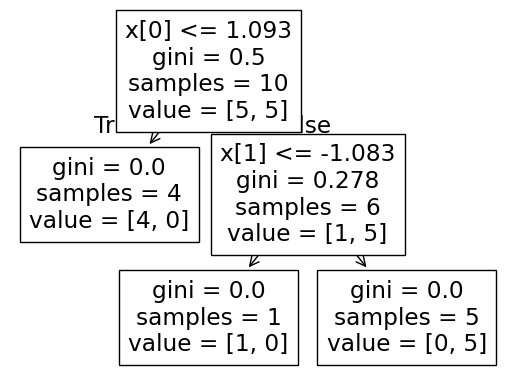

In [10]:
plot_tree(dt1)

[Text(0.5, 0.75, 'x[1] <= 0.887\ngini = 0.48\nsamples = 10\nvalue = [6, 4]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.625, 0.5, '  False')]

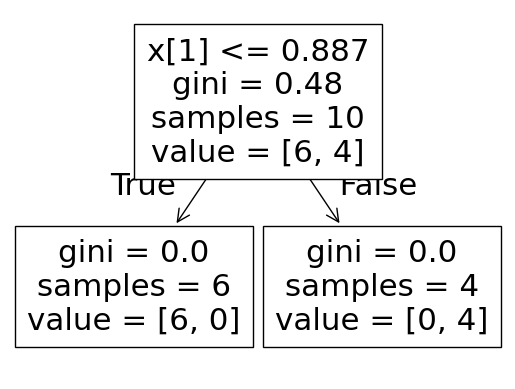

In [11]:
plot_tree(dt2)

[Text(0.4, 0.8333333333333334, 'x[3] <= 0.333\ngini = 0.48\nsamples = 10\nvalue = [4, 6]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.30000000000000004, 0.6666666666666667, 'True  '),
 Text(0.6, 0.5, 'x[4] <= -2.271\ngini = 0.444\nsamples = 6\nvalue = [4, 2]'),
 Text(0.5, 0.6666666666666667, '  False'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]')]

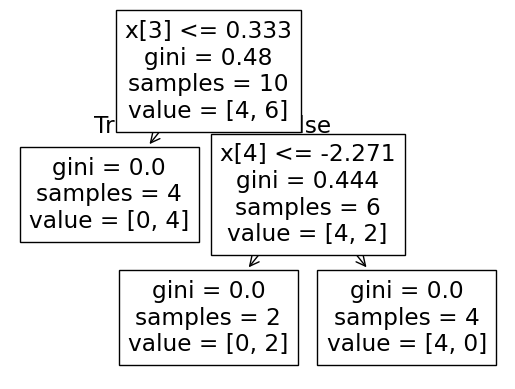

In [12]:
plot_tree(dt3)

In [13]:

# target value: 1
dt1.predict(np.array([-1.290093,-0.367695,-1.353258,-0.181921,0.160877]).reshape(1,5))


/home/yasin/all_program/machine_learning/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [14]:
dt2.predict(np.array([-1.290093,-0.367695,-1.353258,-0.181921,0.160877]).reshape(1,5))

/home/yasin/all_program/machine_learning/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [15]:

# here, 2 model give output: 1 and another model give output: 0 
# and our final ans is: 1
dt3.predict(np.array([-1.290093,-0.367695,-1.353258,-0.181921,0.160877]).reshape(1,5))


/home/yasin/all_program/machine_learning/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

<br>
<br>

# #02 column sampling: 

<br>
<br>

In [16]:
col_sampling(df,0.8)

,col5,col2,col1,col2,target
0,0.414149,1.116070,1.322058,1.116070,0
1,1.754678,-1.280584,1.889970,-1.280584,0
2,-2.582910,0.010004,2.173644,0.010004,1
3,1.524676,2.542389,0.795411,2.542389,0
4,0.015016,1.106583,3.559610,1.106583,1
...,...,...,...,...,...
95,0.636592,-3.192996,3.170486,-3.192996,0
96,-1.169678,0.386542,1.358637,0.386542,1
97,-0.366013,-1.088347,2.984932,-1.088347,1
98,-2.021738,-4.156355,0.580295,-4.156355,0


In [17]:

# col sampling: 
df1 = col_sampling(df,0.8)
print(df1.shape)

df2 = col_sampling(df,0.8)
print(df2.shape)

df3 = col_sampling(df,0.8)
print(df3.shape)

(100, 5)
(100, 5)
(100, 5)


In [18]:

dt1 = DecisionTreeClassifier()
dt2 = DecisionTreeClassifier()
dt3 = DecisionTreeClassifier()

dt1.fit(df1.iloc[:,:4],df1.iloc[:,4:])
dt2.fit(df2.iloc[:,:4],df2.iloc[:,4:])
dt3.fit(df3.iloc[:,:4],df3.iloc[:,4:])


DecisionTreeClassifier()

In [19]:

# target value: 1
dt1.predict(np.array([-1.290093,-0.367695,-1.353258,-0.181921]).reshape(1,4))


/home/yasin/all_program/machine_learning/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [20]:

dt2.predict(np.array([-1.290093,-0.367695,-1.353258,-0.181921]).reshape(1,4))


/home/yasin/all_program/machine_learning/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [21]:

# here, the 3 model give output: 1 and our actual output is also: 1
dt3.predict(np.array([-1.290093,-0.367695,-1.353258,-0.181921]).reshape(1,4))


/home/yasin/all_program/machine_learning/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])


` X,y = make_classification(n_samples=100,n_features=5,n_redundant=0,n_informative=5,n_clusters_per_class=1), Here, when every time run the code, it generate a new dataset.to get the accurate result, please also change the predicted array.`


<br>

---

<br>

`We see that, every time we give, random vaule in our decision tree classifer. That's why Random foreset can give us Low-bias and Low-Variance model.`

<br>

---

<br>